In [1468]:
import csv
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [1469]:
def read_fsi():
    csvFile = open("modified_fsi-2017.csv", "r")
    reader = csv.reader(csvFile)
    attr_dic = {}
    score_dic = {}
    attributes = []
    for item in reader:
        # ignore the first line
        if reader.line_num == 1:
            attributes = item[4:]
            continue
        attr_dic[item[0]] = [float(i) for i in item[4:]]
        score_dic[item[0]] = float(item[3])
    csvFile.close()
    return attr_dic, score_dic, attributes

In [1470]:
def input_fsi():
    attr_dic, score_dic, attributes = read_fsi()
    for (idx, item) in enumerate(attr_dic):
        if idx == 0:
            attr = np.array(attr_dic[item])
        new_attr = np.array(attr_dic[item])
        attr = np.vstack((attr, new_attr))
    for (idx, item) in enumerate(score_dic):
        if idx == 0:
            score = np.array(score_dic[item])
        new_score = np.array(score_dic[item])
        score = np.vstack((score, new_score))
    return attr, score

In [1471]:
def read_epi():
    csvFile = open("modified_EPI.csv", "r")
    reader = csv.reader(csvFile)
    attr_dic = {}
    score_dic = {}
    attributes = []
    for item in reader:
        # ignore the first line
        if reader.line_num == 1:
            attributes = item[3:10]
            continue
        attr_dic[item[2]] = [float(i) for i in item[3:10]]
        score_dic[item[2]] = float(item[10])
    csvFile.close()
    return attr_dic, score_dic, attributes

In [1472]:
def input_epi():
    attr_dic, score_dic, attributes = read_epi()
    for (idx, item) in enumerate(attr_dic):
        if idx == 0:
            attr = np.array(attr_dic[item])
        new_attr = np.array(attr_dic[item])
        attr = np.vstack((attr, new_attr))
    for (idx, item) in enumerate(score_dic):
        if idx == 0:
            score = np.array(score_dic[item])
        new_score = np.array(score_dic[item])
        score = np.vstack((score, new_score))
    return attr, score

In [1473]:
attr, score = input_epi()

In [1474]:
def share_country():
    '''
    Find shared countries of FSI and EPI data.
    Return:
        FSI_data -- FSI data sorted according to countries.
        EPI_data -- EPI data sorted according to countries.
    Note that these two dictionaries have the same number of countries.
    And they also have the aligned attributes based on countries order.
    '''
    fsi_attrdic, fsi_scoredic, fsi_attributes = read_fsi()
    epi_attrdic, epi_scoredic, epi_attributes = read_epi()
    share_key = []
    cnt = 0
    # First, delete all keys and values in fsi but not in epi
    for (idx, item) in enumerate(fsi_attrdic):
        epi_key = list(epi_attrdic.keys())
        if item in epi_key:
            if cnt == 0:
                fsi_attr = np.array(fsi_attrdic[item]).reshape(1,-1)
                fsi_score = np.array(fsi_scoredic[item])
                share_key.append(item)
            else:
                share_key.append(item)
                fsi_attr = np.vstack((fsi_attr, fsi_attrdic[item]))
                fsi_score = np.vstack((fsi_score, fsi_scoredic[item]))
            cnt += 1
    cnt = 0
    # Second, delete all keys and values in epi but not in fsi
    for (idx, item) in enumerate(epi_attrdic):
        fsi_key = list(fsi_attrdic.keys())
        if item in fsi_key:
            if cnt == 0:
                epi_attr = np.array(epi_attrdic[item]).reshape(1,-1)
                epi_score = np.array(epi_scoredic[item])
            else:
                epi_attr = np.vstack((epi_attr, epi_attrdic[item]))
                epi_score = np.vstack((epi_score, epi_scoredic[item]))
            cnt += 1
    df = pd.DataFrame(data = {'country': share_key,
                              'FSI': fsi_score.ravel(),
                              'EPI': epi_score.ravel(),
                              fsi_attributes[0]: fsi_attr[:,0].ravel(),
                              fsi_attributes[1]: fsi_attr[:,1].ravel(), 
                              fsi_attributes[2]: fsi_attr[:,2].ravel(),
                              fsi_attributes[3]: fsi_attr[:,3].ravel(), 
                              fsi_attributes[4]: fsi_attr[:,4].ravel(),
                              fsi_attributes[5]: fsi_attr[:,5].ravel(), 
                              fsi_attributes[6]: fsi_attr[:,6].ravel(),
                              fsi_attributes[7]: fsi_attr[:,7].ravel(), 
                              fsi_attributes[8]: fsi_attr[:,8].ravel(),
                              fsi_attributes[9]: fsi_attr[:,9].ravel(),
                              fsi_attributes[10]: fsi_attr[:,10].ravel(), 
                              fsi_attributes[11]: fsi_attr[:,11].ravel(),
                              epi_attributes[0]: epi_attr[:,0].ravel(),
                              epi_attributes[1]: epi_attr[:,1].ravel(), 
                              epi_attributes[2]: epi_attr[:,2].ravel(),
                              epi_attributes[3]: epi_attr[:,3].ravel(), 
                              epi_attributes[4]: epi_attr[:,4].ravel(),
                              epi_attributes[5]: epi_attr[:,5].ravel(), 
                              epi_attributes[6]: epi_attr[:,6].ravel()})
    df.to_csv('share_data1.csv')
    return share_key, fsi_attr, epi_attr

In [1475]:
country, fsi_attr, epi_attr = share_country()

In [1476]:
def input_result():
    csvFile = open("share_data.csv", "r")
    reader = csv.reader(csvFile)
    fsi_dic = {}
    epi_dic = {}
    fsi = []
    epi = []
    for item in reader:
        # ignore the first line
        if reader.line_num == 1:
            continue
        fsi_dic[item[1]] = float(item[2])
        epi_dic[item[1]] = float(item[3])
        fsi.append(float(item[2]))
        epi.append(float(item[3]))
    csvFile.close()
    return fsi, epi

In [1477]:
fsi, epi = input_result()

In [1478]:
plt.scatter(fsi, epi)

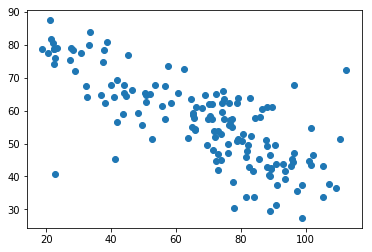

In [1479]:
plt.show()

In [1480]:
from sklearn.cluster import KMeans

In [1481]:
def cluster(data, n_clusters):
    '''
    Cluster data into n_clusters categories.
    Input:
        data -- The input data to be clustered.
        n_clusters -- The number of categories to be clustered.
    Return:
        label_pred -- The category array corresponding to every data.
    '''
    estimator = KMeans(n_clusters = n_clusters)
    estimator.fit(data)
    label_pred = estimator.labels_
    print(label_pred)
    return label_pred

In [1482]:
FSI_data = np.array([fsi]).reshape([-1,1])
EPI_data = np.array([epi]).reshape([-1,1])
#FSI_label = cluster(FSI_data, 2)
#EPI_label = cluster(EPI_data, 2)
FSI_label = FSI_data > 80
EPI_label = EPI_data < 50

In [1483]:
#FSI_label = 1-FSI_label

In [1484]:
plt.scatter(FSI_data[FSI_label == 1], EPI_data[FSI_label == 1], c = 'r')
plt.scatter(FSI_data[FSI_label == 0], EPI_data[FSI_label == 0], c = 'b')

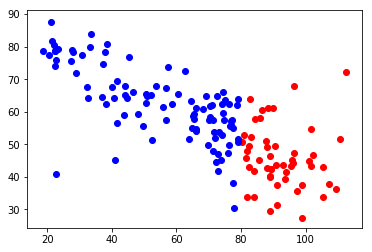

In [1485]:
plt.show()

In [1486]:
plt.scatter(FSI_data[EPI_label == 1], EPI_data[EPI_label == 1], c = 'r')
plt.scatter(FSI_data[EPI_label == 0], EPI_data[EPI_label == 0], c = 'b')

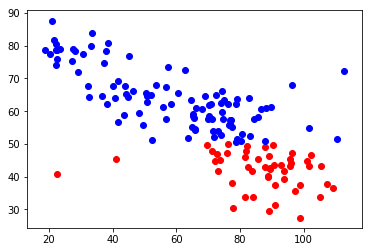

In [1487]:
plt.show()

In [1488]:
def find_bound(data, label, mode = 1):
    '''
    Find the boundary of clusters.
    Input:
        data -- The input data to be clustered.
        label -- The label corresponding to the input data.
        mode -- mode = 1 means we need to find the minimum bound of data with label = 1 while maximum bound for label = 0.
                mode = 0 means we need to find the maximum bound of data with label = 0 while maximum bound for label = 1.
    Return:
        bound -- The boundary of 1-dim cluster.
    '''
    if mode:
        label1_min = min(data[label == 1])
        label0_max = max(data[label == 0])
        bound = (label1_min+label0_max)/2
    else:
        label1_max = max(data[label == 1])
        label0_min = min(data[label == 0])
        bound = (label1_max+label0_min)/2
    return bound

In [1489]:
FSI_bound = find_bound(FSI_data, FSI_label)
EPI_bound = find_bound(EPI_data, EPI_label)
plt.scatter(FSI_data[(FSI_label == 1) & (EPI_label == 1)], EPI_data[(FSI_label == 1) & (EPI_label == 1)], c = 'r')
plt.scatter(FSI_data[(FSI_label == 1) & (EPI_label == 0)], EPI_data[(FSI_label == 1) & (EPI_label == 0)], c = 'b')
plt.scatter(FSI_data[(FSI_label == 0) & (EPI_label == 1)], EPI_data[(FSI_label == 0) & (EPI_label == 1)], c = 'm')
plt.scatter(FSI_data[(FSI_label == 0) & (EPI_label == 0)], EPI_data[(FSI_label == 0) & (EPI_label == 0)], c = 'y')
FSI_bound_y = np.linspace(min(EPI_data), max(EPI_data), 1000)
FSI_bound_x = np.full(FSI_bound_y.shape, FSI_bound)
EPI_bound_x = np.linspace(min(FSI_data), max(FSI_data), 1000)
EPI_bound_y = np.full(EPI_bound_x.shape, EPI_bound)
plt.plot(FSI_bound_x, FSI_bound_y, c = 'k')
plt.plot(EPI_bound_x, EPI_bound_y, c = 'k')
plt.xlabel('FSI')
plt.ylabel('EPI')

Text(0,0.5,'EPI')

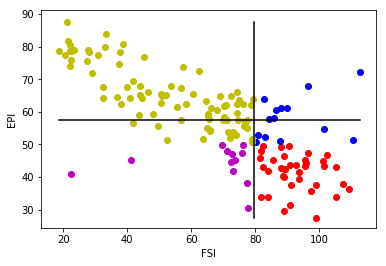

In [1490]:
plt.show()

In [1491]:
def logistic_util(X, Y, test_size, random_state):
    '''
    Implement logistic regression with sklearn.
    Input:
        X -- The independent variables set.
        Y -- The dependent variable/target set.
        test_size -- Test size of the whole set.
        random_state -- Param for train_test_split.
    Output:
        lr -- Logistic Regression Result.
    '''
    #X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)
    #Y_train, Y_test = Y_train.ravel(), Y_test.ravel()
    #print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
    # Normalize the data
    X_train=X
    Y_train=Y.flatten()
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = np.array(list(sc.transform(X_train)))
    #X_test_std = np.array(list(sc.transform(X_test)))
    # Combine the train and test data
    #X_combined_std = np.vstack((X_train_std, X_test_std))
    #Y_combined = np.hstack((Y_train, Y_test))
    # Implement logistic regression
    lr = LogisticRegression(C = 0.01, random_state = 0)
    lr.fit(X_train_std, Y_train)
    #print(lr.predict_proba(X_test_std[2,:].reshape(1,-1))[0,0], Y_test[2])
    #scores = cross_val_score(lr, X_combined_std, Y_combined, cv = 5, scoring = 'accuracy')
    #print(scores)
    return lr,X_train_std, Y# X_combined_std, Y_combined
    '''
    plot_decision_regions(X_combined_std, Y_combined, clf = lr, res = 0.02)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend(loc = 'upper left')
    plt.show()
    '''

In [1492]:
from sklearn.cross_validation import cross_val_score

In [1493]:
lr1, fsi_attr_std, _ = logistic_util(fsi_attr, EPI_label, 0.1, 0)
probE0_H = lr1.predict_proba(fsi_attr_std)[:,0]
probE1_H = np.ones(probE0_H.shape)-probE0_H

In [1494]:
lr2, fsi_attr_std, _ = logistic_util(fsi_attr, (EPI_label == 0) & (FSI_label == 1), 0.1, 0)
prob_other = lr2.predict_proba(fsi_attr_std)[:,0]
probE0F1_H = np.ones(prob_other.shape)-prob_other

In [1495]:
lr3, fsi_attr_std, _ = logistic_util(fsi_attr, (EPI_label == 1) & (FSI_label == 1), 0.1, 0)
prob_other = lr3.predict_proba(fsi_attr_std)[:,0]
probE1F1_H = np.ones(prob_other.shape)-prob_other

In [1496]:
probF1_E0H = probE0F1_H / probE0_H
probF1_E1H = probE1F1_H / probE1_H
print(probF1_E0H.shape, probF1_E1H.shape)

(148,) (148,)


In [1497]:
fragile_value = []
for i in range(len(fsi_attr_std)):
    if EPI_label[i] == 1:
        fragile_value.append(probF1_E1H[i])
    else:
        fragile_value.append(probF1_E0H[i])
print(fragile_value[129], EPI_label[129], probF1_E1H[129])

0.312127275482 [False] 0.888897051004


In [1498]:
fragile_value = np.array(fragile_value).reshape(-1,1)
sc = StandardScaler()
sc.fit(np.log(fragile_value))
fragile_std = (255*(np.array(list(sc.transform(fragile_value)))+1)/2).astype(np.uint8)
fragile_std = fragile_std.reshape(len(fragile_std))

In [1499]:
import seaborn as sn
pal = np.array(sn.color_palette("Blues", 155))
sorted_idx = sorted(range(len(fragile_value)), key=lambda k: fragile_value[k])
color = pal[sorted_idx]

In [1500]:
FSI_bound = find_bound(FSI_data, FSI_label)
EPI_bound = find_bound(EPI_data, EPI_label)
plt.scatter(FSI_data[(FSI_label == 1) & (EPI_label == 1)], EPI_data[(FSI_label == 1) & (EPI_label == 1)], c = color, cmap = plt.cm.Blues)
plt.scatter(FSI_data[(FSI_label == 1) & (EPI_label == 0)], EPI_data[(FSI_label == 1) & (EPI_label == 0)], c = color, cmap = plt.cm.Blues)
plt.scatter(FSI_data[(FSI_label == 0) & (EPI_label == 1)], EPI_data[(FSI_label == 0) & (EPI_label == 1)], c = color, cmap = plt.cm.Blues)
plt.scatter(FSI_data[(FSI_label == 0) & (EPI_label == 0)], EPI_data[(FSI_label == 0) & (EPI_label == 0)], c = color, cmap = plt.cm.Blues)
FSI_bound_y = np.linspace(min(EPI_data), max(EPI_data), 1000)
FSI_bound_x = np.full(FSI_bound_y.shape, FSI_bound)
EPI_bound_x = np.linspace(min(FSI_data), max(FSI_data), 1000)
EPI_bound_y = np.full(EPI_bound_x.shape, EPI_bound)
plt.plot(FSI_bound_x, FSI_bound_y, c = 'k')
plt.plot(EPI_bound_x, EPI_bound_y, c = 'k')
plt.xlabel('FSI')
plt.ylabel('EPI')

Text(0,0.5,'EPI')

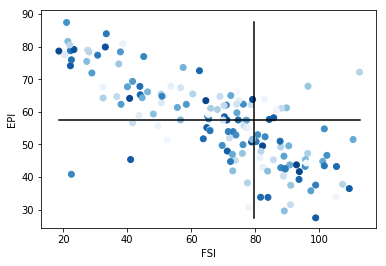

In [1501]:
plt.show()

In [1502]:
country = np.array(country)
print(country.shape)
print(country[fragile_value.reshape(len(country)) > 1.0])

(148,)
['Central African Republic' "Cote d'Ivoire" 'Egypt' 'Guatemala' 'Lebanon'
 'Nigeria' 'Philippines' 'Sri Lanka' 'Sudan' 'Tanzania' 'Zambia']


In [1503]:
df_fragile = pd.DataFrame(data={'country':country,'fragility':fragile_value.flatten()})

In [1504]:
df_fragile['FSI']=FSI_data.flatten()
df_fragile['EPI']=EPI_data.flatten()

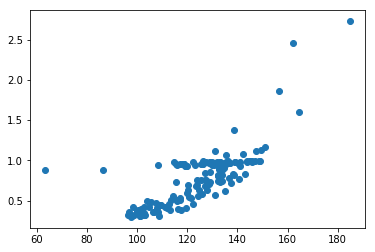

In [1505]:
plt.scatter(df_fragile.EPI+df_fragile.FSI,df_fragile.fragility)
plt.show()

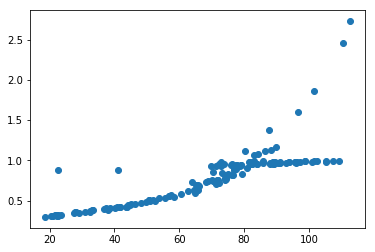

In [1506]:
plt.scatter(df_fragile.FSI, (df_fragile.fragility))
plt.show()

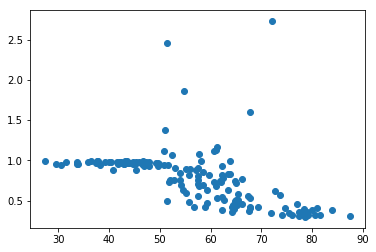

In [1507]:
plt.scatter(df_fragile.EPI, (df_fragile.fragility))
plt.show()

In [1508]:
df_fragile['fragility_log']=np.log(df_fragile.fragility)

In [1509]:
df_fragile[df_fragile['country']=='Switzerland'] 
df_fragile[df_fragile['country']=='United States of America']

,country,fragility,FSI,EPI,fragility_log


In [1510]:
def reverse_num(FSI_data, EPI_data, fragile):
    cnt = 0
    rate = []
    for i in range(len(FSI_data)):
        mask = (EPI_data > EPI_data[i]+5) & (FSI_data+1 < FSI_data[i]) & (fragile > fragile[i])
        rate.append(1.0*sum(mask)/(len(FSI_data)-1))
    avg_rate = np.mean(rate)
    print(avg_rate)

In [1511]:
reverse_num(df_fragile.FSI,df_fragile.EPI,df_fragile.fragility)

0.0147545504688


In [1514]:
(df_fragile.FSI>80).sum()

51

In [1515]:
(df_fragile.EPI<50).sum()

49